# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import os
from pprint import pprint
import pickle
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd 
from sklearn.utils import shuffle

import helpers as h 
import architectures as arch
MY_DEV = "/cpu:0"
if os.name == "nt" : # running on windows
    DATA_DIR = "C:/_DATA/autonomous-driving-nd/traffic_signs_classifier/"
    MY_DEV = "/cpu:0"
else : 
    DATA_DIR = "../data/"
    MY_DEV = "/gpu:0"
# These files were downloaded from the data directory in the workshop enviornment
training_file   = DATA_DIR + "train.p"
validation_file = DATA_DIR + "valid.p"
testing_file    = DATA_DIR + "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train0, y_train = train['features'], train['labels']
X_valid0, y_valid = valid['features'], valid['labels']
X_test0, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train0.shape[0]

# TODO: Number of validation examples
n_validation = X_valid0.shape[0]

# TODO: Number of testing examples.
n_test = X_test0.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train0.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
uniq_classes = np.unique( np.hstack( [y_train, y_test, y_valid] ) ) 
n_classes = len( uniq_classes ) 

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes,  " min_class =", np.min(uniq_classes), " max_class =", np.max(uniq_classes))

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43  min_class = 0  max_class = 42


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline

n_examples = 7
example_indices = np.zeros( (n_classes, n_examples), dtype=np.int32)

for cls in uniq_classes : 
    all_ = np.where( y_train  == cls )[0]
    example_indices[cls, :] = all_[ np.random.choice(len(all_), n_examples) ]


def plot_examples_classes( example_indices, X_train, min_cls, max_cls ) :
    n_examples = example_indices.shape[1]

    fig, axs = plt.subplots( max_cls - min_cls, n_examples, figsize=(10,10) )
    fig.suptitle( f'Classes {min_cls} to {max_cls -1}')
    for cls in range(min_cls, max_cls): 
        for ex_i in range(n_examples) :
            ax = axs[cls - min_cls, ex_i]
            img_idx = example_indices[cls, ex_i]
            ax.imshow( X_train[ img_idx,...] )
            ax.tick_params( axis='x', which='both', bottom=False,  top=False,  labelbottom=False) 
            ax.tick_params( axis='y', which='both', left=False,    labelleft=False) 


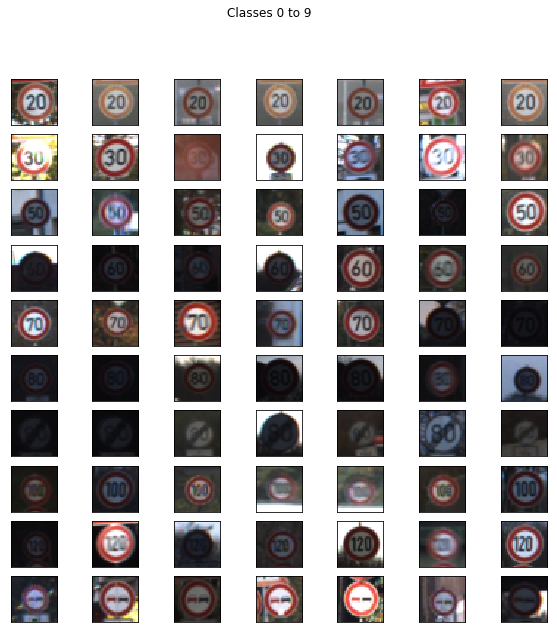

In [4]:
plot_examples_classes( example_indices, X_train0, 0, 10 )

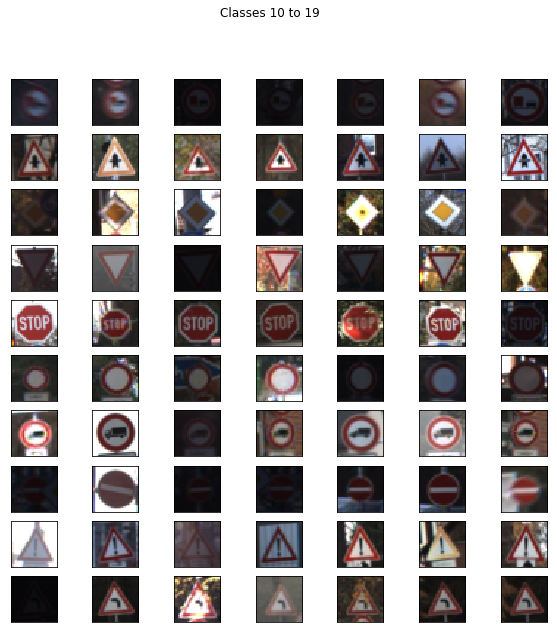

In [5]:
plot_examples_classes( example_indices, X_train0, 10, 20 )

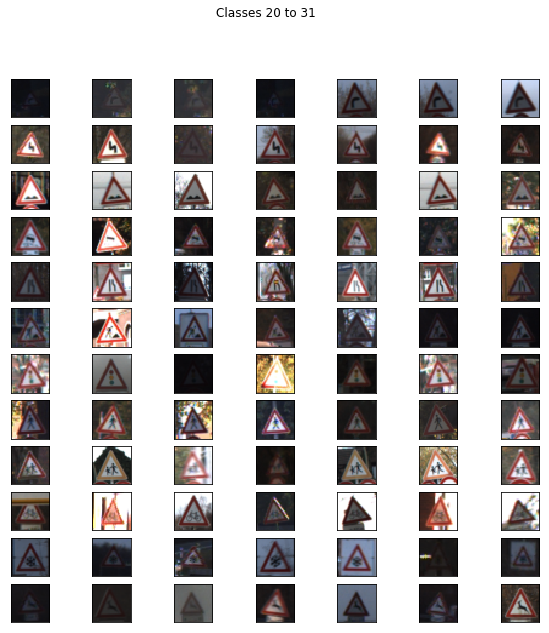

In [6]:
plot_examples_classes( example_indices, X_train0, 20, 32 )

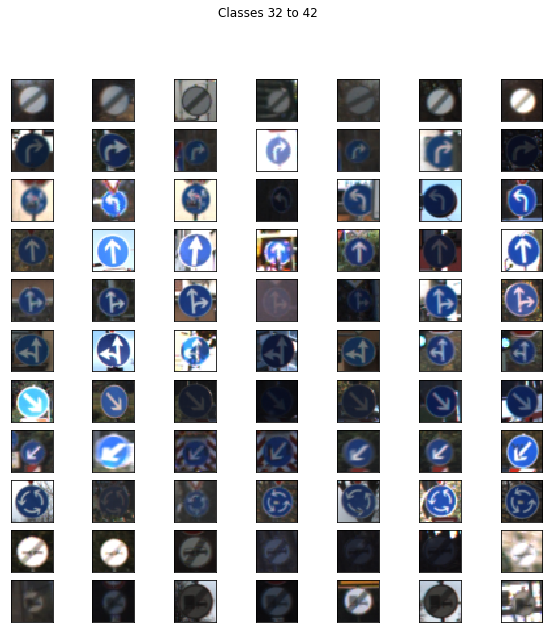

In [7]:
plot_examples_classes( example_indices, X_train0, 32, 43 )

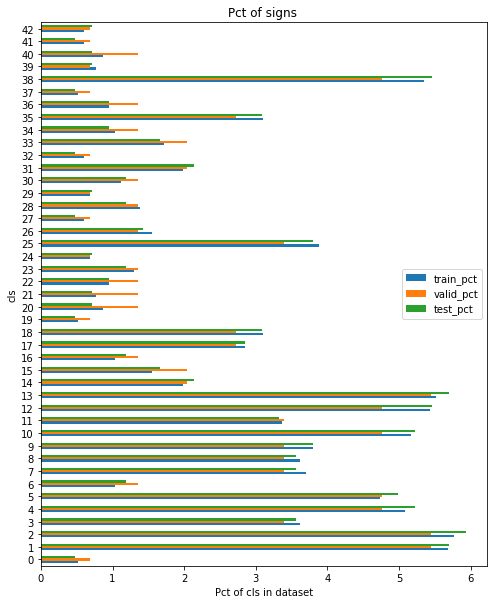

In [8]:
#fig, axs = plt.subplots( 1,3, figsize=(16,5) ) 
y_tr_df = pd.DataFrame( {'cls' : y_train, 'train_cnt' : 1}) 
y_vl_df = pd.DataFrame( {'cls' : y_valid, 'valid_cnt' : 1}) 
y_ts_df = pd.DataFrame( {'cls' : y_test, 'test_cnt' : 1}) 

tr_cnts, vl_cnts, ts_cnts  = [ df.groupby('cls').sum() 
                              for df in [y_tr_df, y_vl_df, y_ts_df] ]

joined = tr_cnts.join( vl_cnts ).join( ts_cnts )

for col in joined.columns : 
    joined[ col.replace('cnt', 'pct') ] = joined[col] / joined[col].sum() * 100.0 
    
fig, ax = plt.subplots(1,1, figsize=(8,10))
ax.set_title('Pct of signs ')
ax.set_xlabel( 'Pct of cls in dataset' )
joined[['train_pct', 'valid_pct', 'test_pct']].plot( kind='barh', ax=ax)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

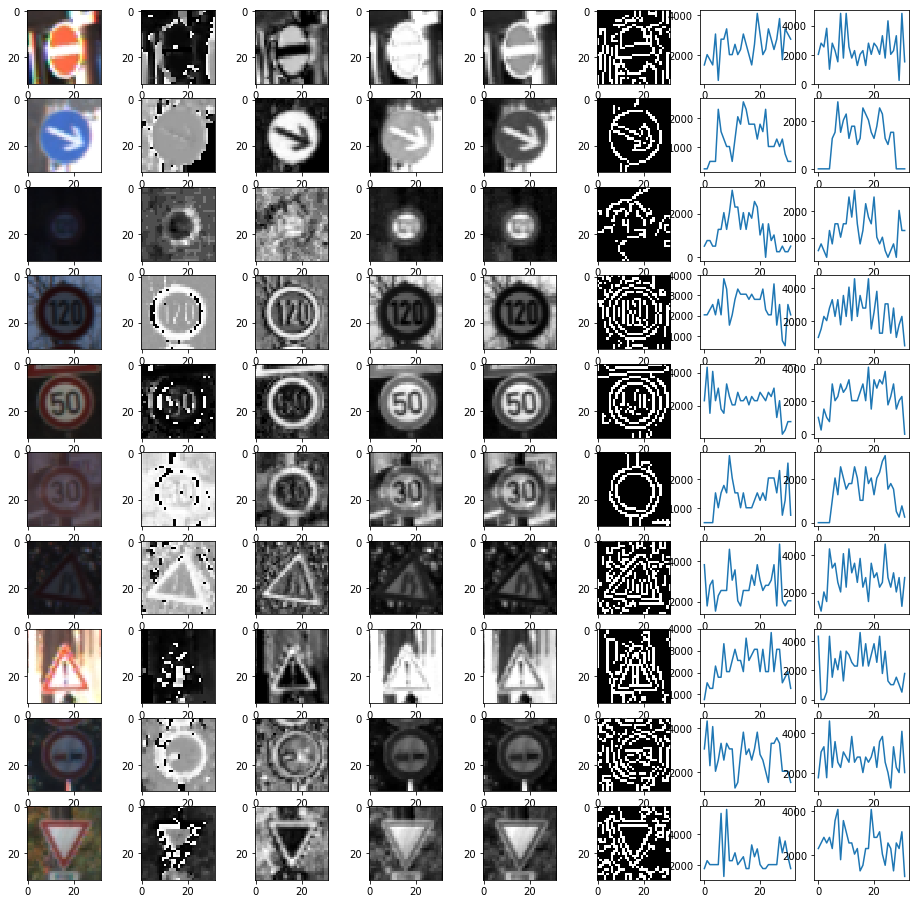

In [19]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#img  = X_valid0[1]  # 245

def preproc( img ) :
    X_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV  )
    X_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS  )

    h, s, v  = X_hsv[:,:,0], X_hsv[:,:,1], X_hsv[:,:,2]
    _, l, _  = X_hls[:,:,0], X_hls[:,:,1], X_hls[:,:,2]

    # edges_h = cv2.Canny(h,100,200)
    edges_s = cv2.Canny(s,100,180)
    
    return [ img, h,s,v, l, edges_s, edges_s.sum(axis=0), edges_s.sum(axis=1) ]

imgs = [X_valid0[i] for i in np.random.choice( X_valid0.shape[0], 10 ) ]
results = [ preproc(img) for img in imgs ]

n_images = 10

fig, axs = plt.subplots( n_images, 8, figsize=(16,16) )
for i, layers in enumerate( results ) :
    axs[i, 0].imshow( layers[0] )
    axs[i, 1].imshow( layers[1], cmap = 'gray')
    axs[i, 2].imshow( layers[2], cmap = 'gray')
    axs[i, 3].imshow( layers[3], cmap = 'gray')
    #axs[i,4].imshow( l, cmap = 'gray')
    axs[i, 4].imshow( layers[4], cmap = 'gray')
    #axs[i, 5].imshow( s - (v-l), cmap = 'gray')
    #axs[i, 5].imshow( layers[5], cmap = 'gray')
    axs[i, 5].imshow( layers[5], cmap = 'gray')
    axs[i, 7].plot( layers[6] )
    axs[i, 6].plot( layers[7] )


## Actual preprocessing we used

In [4]:
## Actual preprocessing we used....
reload(h)

#X_train, X_valid, X_test = [ h.preproc_hs( X ).astype( np.float32 ) for X in [X_train0, X_valid0, X_test0] ]
X_train, X_valid, X_test = [ h.normalize_mean_std( X ).astype( np.float32 ) for X in [X_train0, X_valid0, X_test0] ]
X_train, y_train = shuffle( X_train, y_train )
X_train.shape, X_valid.shape, X_test.shape, X_train.dtype

((34799, 32, 32, 3), (4410, 32, 32, 3), (12630, 32, 32, 3), dtype('float32'))

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from achitectures import arch_b_b

Please see module `architectures.py` for details.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [5]:
del X_train0, X_valid0, X_test0

In [5]:
reload( h )

data = { "X_train" : X_train, "y_train" : y_train,
         "X_valid" : X_valid, "y_valid" : y_valid,
         "X_test" : X_test, "y_test" : y_test     }

if os.name != 'nt' :
    log_pars = { "print_loss_every" : 300,
                 "run_valid_every"  : 300, 
                 "save_prefix" : "model_checkpoints/model"}
else : 
    log_pars = { "print_loss_every" : 3,
                 "run_valid_every"  : 10 }
    

## Hyper-parameter tuning via grid search 

I first tried a grid with $36 = 3 \times 2 \times 2 \times 3$ combinations for 
hyperparameters `netw_arch_name`, `learning_rate`, `batch_size` and `keep_prob`.
Then, when it was apparent that  `arch_3_3_b` was better than the other ones, I further tried four more 
combinations of  `batch_size`  and `keep_prob` for a total of 40 hyper-param combinations.

In [12]:
grid_specs1 = [
    ( "netw_arch_name", ["arch_3_3", "arch_3_3_2fc", "arch_3_3_b"] ),
    ( "learning_rate" , [ 0.0005, 0.0010 ] ),                         
    ( "batch_size" , [ 256, 512] ),
    ( "keep_prob"  , [ 0.9, 0.8, 0.7] ),    ]


grid_specs2 = [
    ( "netw_arch_name", [ "arch_3_3_b"] ),
    ( "learning_rate" , [ 0.0005 ] ),                         
    ( "batch_size" , [ 128, 256] ),
    ( "keep_prob"  , [ 0.65, 0.6 ] ), ]

        
hyp_par_dicts = ( h.make_hyp_par_dicts( grid_specs1 ) + 
                  h.make_hyp_par_dicts( grid_specs2 ) )                                
        
len(hyp_par_dicts)

40

In [ ]:
# searching with memoization of results to files under
# experiment_results subdirectory

for exp_i, hyp_pars in enumerate( hyp_par_dicts ) :
    print( f"\n Experiment {exp_i + 1}/{len(hyp_par_dicts)} :\n")
    
    pprint( hyp_pars )    
    result = hyp_pars.copy()
    
    md5_dig, out_path = h.md5_digest_from_pars( hyp_pars )
    
    if os.path.exists( out_path ) :
        print( out_path + " already there.")
        continue 
    
    result["md5_dig"] = md5_dig
    per_epoch = h.run_training( data, hyp_pars, log_pars, n_epochs = 300) 
    #print("\n", per_epoch, "\n")
    
    result["best_valid_accy"] = per_epoch["valid_accy"].max()    
    result["best_valid_epoch"] = per_epoch['valid_accy'].idxmax()
    
    pprint( result )
    result["per_epoch"] = per_epoch    
    h.to_pickle( result,  out_path )


 Experiment 1/4 :

{'batch_size': 128,
 'keep_prob': 0.65,
 'learning_rate': 0.0005,
 'netw_arch_name': 'arch_3_3_b'}
experiment_results/exp_82ca6628.pkl already there.

 Experiment 2/4 :

{'batch_size': 128,
 'keep_prob': 0.6,
 'learning_rate': 0.0005,
 'netw_arch_name': 'arch_3_3_b'}
 1 conv1        conv2d           [30, 30, 32]     #params:     896
 2 max_p1       max_pool         [15, 15, 32]     #params:       0
 3 conv2        conv2d           [13, 13, 32]     #params:    9248
 4 max_p2       max_pool         [7, 7, 32]       #params:       0
 5 conv3        conv2d           [3, 3, 16]       #params:   12816
 6 flat1        flatten          [144]            #params:       0
 7 fc1          fully_connected  [120]            #params:   17400
 8 dropout_1    dropout          [120]            #params:       0
 9 fc2          fully_connected  [84]             #params:   10164
10 dropout_2    dropout          [84]             #params:       0
no non-linearity
11 logits       fully_con

**Epoch 77, Avg. Loss: 0.7128  Train accuracy:  0.7614  Valid. accuracy: 0.4102 elapsed=3.85
**Epoch 78, Avg. Loss: 0.6690  Train accuracy:  0.7852  Valid. accuracy: 0.4181 elapsed=3.79
**Epoch 79, Avg. Loss: 0.6953  Train accuracy:  0.7809  Valid. accuracy: 0.4224 elapsed=3.83
**Epoch 80, Avg. Loss: 0.6201  Train accuracy:  0.7984  Valid. accuracy: 0.4696 elapsed=3.86
**Epoch 81, Avg. Loss: 0.6055  Train accuracy:  0.8024  Valid. accuracy: 0.4435 elapsed=3.81
**Epoch 82, Avg. Loss: 0.6082  Train accuracy:  0.8033  Valid. accuracy: 0.4340 elapsed=3.80
**Epoch 83, Avg. Loss: 0.6203  Train accuracy:  0.7998  Valid. accuracy: 0.4805 elapsed=3.78
**Epoch 84, Avg. Loss: 0.6886  Train accuracy:  0.7888  Valid. accuracy: 0.4902 elapsed=3.79
**Epoch 85, Avg. Loss: 0.6419  Train accuracy:  0.8000  Valid. accuracy: 0.4975 elapsed=3.83
**Epoch 86, Avg. Loss: 0.6714  Train accuracy:  0.7937  Valid. accuracy: 0.4710 elapsed=3.92
**Epoch 87, Avg. Loss: 0.6501  Train accuracy:  0.8008  Valid. accurac

**Epoch 165, Avg. Loss: 0.1602  Train accuracy:  0.9536  Valid. accuracy: 0.8181 elapsed=3.77
**Epoch 166, Avg. Loss: 0.1593  Train accuracy:  0.9526  Valid. accuracy: 0.8376 elapsed=3.77
**Epoch 167, Avg. Loss: 0.1626  Train accuracy:  0.9554  Valid. accuracy: 0.8610 elapsed=3.79
**Epoch 168, Avg. Loss: 0.1368  Train accuracy:  0.9601  Valid. accuracy: 0.8676 elapsed=3.79
**Epoch 169, Avg. Loss: 0.1130  Train accuracy:  0.9674  Valid. accuracy: 0.8574 elapsed=3.79
**Epoch 170, Avg. Loss: 0.1173  Train accuracy:  0.9661  Valid. accuracy: 0.8717 elapsed=3.84
**Epoch 171, Avg. Loss: 0.1197  Train accuracy:  0.9670  Valid. accuracy: 0.8474 elapsed=3.87
**Epoch 172, Avg. Loss: 0.1398  Train accuracy:  0.9623  Valid. accuracy: 0.8488 elapsed=3.79
**Epoch 173, Avg. Loss: 0.1325  Train accuracy:  0.9620  Valid. accuracy: 0.8435 elapsed=3.82
**Epoch 174, Avg. Loss: 0.1167  Train accuracy:  0.9654  Valid. accuracy: 0.8483 elapsed=3.80
**Epoch 175, Avg. Loss: 0.1079  Train accuracy:  0.9694  Val

**Epoch 253, Avg. Loss: 0.0170  Train accuracy:  0.9958  Valid. accuracy: 0.9698 elapsed=3.83
**Epoch 254, Avg. Loss: 0.0170  Train accuracy:  0.9955  Valid. accuracy: 0.9692 elapsed=3.88
**Epoch 255, Avg. Loss: 0.0161  Train accuracy:  0.9957  Valid. accuracy: 0.9626 elapsed=3.85
**Epoch 256, Avg. Loss: 0.0199  Train accuracy:  0.9946  Valid. accuracy: 0.9694 elapsed=3.84
**Epoch 257, Avg. Loss: 0.0164  Train accuracy:  0.9956  Valid. accuracy: 0.9723 elapsed=3.84
**Epoch 258, Avg. Loss: 0.0136  Train accuracy:  0.9963  Valid. accuracy: 0.9687 elapsed=3.87
**Epoch 259, Avg. Loss: 0.0131  Train accuracy:  0.9959  Valid. accuracy: 0.9705 elapsed=3.81
**Epoch 260, Avg. Loss: 0.0136  Train accuracy:  0.9964  Valid. accuracy: 0.9728 elapsed=3.79
**Epoch 261, Avg. Loss: 0.0170  Train accuracy:  0.9956  Valid. accuracy: 0.9646 elapsed=3.85
**Epoch 262, Avg. Loss: 0.0214  Train accuracy:  0.9941  Valid. accuracy: 0.9537 elapsed=3.82
**Epoch 263, Avg. Loss: 0.0491  Train accuracy:  0.9897  Val

**Epoch 28, Avg. Loss: 1.9345  Train accuracy:  0.3666  Valid. accuracy: 0.4263 elapsed=2.72
**Epoch 29, Avg. Loss: 1.9150  Train accuracy:  0.3701  Valid. accuracy: 0.4159 elapsed=2.79
**Epoch 30, Avg. Loss: 1.7887  Train accuracy:  0.4045  Valid. accuracy: 0.4245 elapsed=2.74
**Epoch 31, Avg. Loss: 1.7362  Train accuracy:  0.4285  Valid. accuracy: 0.4687 elapsed=2.74
**Epoch 32, Avg. Loss: 1.6478  Train accuracy:  0.4682  Valid. accuracy: 0.4118 elapsed=2.75
**Epoch 33, Avg. Loss: 1.5744  Train accuracy:  0.4931  Valid. accuracy: 0.5011 elapsed=2.77
**Epoch 34, Avg. Loss: 1.4967  Train accuracy:  0.5163  Valid. accuracy: 0.4782 elapsed=2.78
**Epoch 35, Avg. Loss: 1.4217  Train accuracy:  0.5392  Valid. accuracy: 0.4764 elapsed=2.74
**Epoch 36, Avg. Loss: 1.4758  Train accuracy:  0.5159  Valid. accuracy: 0.4585 elapsed=2.74
**Epoch 37, Avg. Loss: 1.4283  Train accuracy:  0.5323  Valid. accuracy: 0.4635 elapsed=2.75
**Epoch 38, Avg. Loss: 1.3761  Train accuracy:  0.5468  Valid. accurac

**Epoch 116, Avg. Loss: 0.0530  Train accuracy:  0.9842  Valid. accuracy: 0.9605 elapsed=2.72
**Epoch 117, Avg. Loss: 0.0531  Train accuracy:  0.9840  Valid. accuracy: 0.9612 elapsed=2.75
**Epoch 118, Avg. Loss: 0.0490  Train accuracy:  0.9853  Valid. accuracy: 0.9569 elapsed=2.74
**Epoch 119, Avg. Loss: 0.0501  Train accuracy:  0.9850  Valid. accuracy: 0.9605 elapsed=2.75
**Epoch 120, Avg. Loss: 0.0513  Train accuracy:  0.9843  Valid. accuracy: 0.9605 elapsed=2.77
**Epoch 121, Avg. Loss: 0.0499  Train accuracy:  0.9844  Valid. accuracy: 0.9558 elapsed=2.81
**Epoch 122, Avg. Loss: 0.0522  Train accuracy:  0.9843  Valid. accuracy: 0.9608 elapsed=2.76
**Epoch 123, Avg. Loss: 0.0476  Train accuracy:  0.9849  Valid. accuracy: 0.9510 elapsed=2.74
**Epoch 124, Avg. Loss: 0.0436  Train accuracy:  0.9866  Valid. accuracy: 0.9621 elapsed=2.75
**Epoch 125, Avg. Loss: 0.0366  Train accuracy:  0.9892  Valid. accuracy: 0.9619 elapsed=2.73
**Epoch 126, Avg. Loss: 0.0318  Train accuracy:  0.9900  Val

**Epoch 204, Avg. Loss: 0.0699  Train accuracy:  0.9846  Valid. accuracy: 0.9447 elapsed=2.76
**Epoch 205, Avg. Loss: 0.0244  Train accuracy:  0.9934  Valid. accuracy: 0.9687 elapsed=2.74
**Epoch 206, Avg. Loss: 0.0088  Train accuracy:  0.9975  Valid. accuracy: 0.9683 elapsed=2.75
**Epoch 207, Avg. Loss: 0.0058  Train accuracy:  0.9984  Valid. accuracy: 0.9678 elapsed=2.74
**Epoch 208, Avg. Loss: 0.0053  Train accuracy:  0.9986  Valid. accuracy: 0.9689 elapsed=2.75
**Epoch 209, Avg. Loss: 0.0071  Train accuracy:  0.9979  Valid. accuracy: 0.9698 elapsed=2.77
**Epoch 210, Avg. Loss: 0.0048  Train accuracy:  0.9988  Valid. accuracy: 0.9710 elapsed=2.76
**Epoch 211, Avg. Loss: 0.0061  Train accuracy:  0.9984  Valid. accuracy: 0.9705 elapsed=2.77
**Epoch 212, Avg. Loss: 0.0049  Train accuracy:  0.9988  Valid. accuracy: 0.9707 elapsed=2.76
**Epoch 213, Avg. Loss: 0.0057  Train accuracy:  0.9982  Valid. accuracy: 0.9676 elapsed=2.76
**Epoch 214, Avg. Loss: 0.0049  Train accuracy:  0.9988  Val

**Epoch 292, Avg. Loss: 0.0324  Train accuracy:  0.9925  Valid. accuracy: 0.9420 elapsed=2.73
**Epoch 293, Avg. Loss: 0.0259  Train accuracy:  0.9932  Valid. accuracy: 0.9581 elapsed=2.74
**Epoch 294, Avg. Loss: 0.0067  Train accuracy:  0.9979  Valid. accuracy: 0.9692 elapsed=2.75
**Epoch 295, Avg. Loss: 0.0040  Train accuracy:  0.9990  Valid. accuracy: 0.9687 elapsed=2.73
**Epoch 296, Avg. Loss: 0.0029  Train accuracy:  0.9990  Valid. accuracy: 0.9683 elapsed=2.74
**Epoch 297, Avg. Loss: 0.0023  Train accuracy:  0.9993  Valid. accuracy: 0.9664 elapsed=2.72
**Epoch 298, Avg. Loss: 0.0025  Train accuracy:  0.9993  Valid. accuracy: 0.9687 elapsed=2.77
**Epoch 299, Avg. Loss: 0.0035  Train accuracy:  0.9990  Valid. accuracy: 0.9696 elapsed=2.75
**Epoch 300, Avg. Loss: 0.0025  Train accuracy:  0.9992  Valid. accuracy: 0.9689 elapsed=2.74
{'batch_size': 256,
 'best_valid_accy': 0.97460347414016724,
 'best_valid_epoch': 270,
 'keep_prob': 0.65,
 'learning_rate': 0.0005,
 'md5_dig': '663b39b1

**Epoch 68, Avg. Loss: 0.7940  Train accuracy:  0.7314  Valid. accuracy: 0.7492 elapsed=2.72
**Epoch 69, Avg. Loss: 0.7399  Train accuracy:  0.7512  Valid. accuracy: 0.7864 elapsed=2.74
**Epoch 70, Avg. Loss: 0.6835  Train accuracy:  0.7750  Valid. accuracy: 0.7980 elapsed=2.74
**Epoch 71, Avg. Loss: 0.6432  Train accuracy:  0.7901  Valid. accuracy: 0.8000 elapsed=2.70
**Epoch 72, Avg. Loss: 0.6523  Train accuracy:  0.7880  Valid. accuracy: 0.7828 elapsed=2.70
**Epoch 73, Avg. Loss: 0.6593  Train accuracy:  0.7777  Valid. accuracy: 0.7857 elapsed=2.71
**Epoch 74, Avg. Loss: 0.6052  Train accuracy:  0.7982  Valid. accuracy: 0.8290 elapsed=2.71
**Epoch 75, Avg. Loss: 0.5633  Train accuracy:  0.8132  Valid. accuracy: 0.8401 elapsed=2.73
**Epoch 76, Avg. Loss: 0.5407  Train accuracy:  0.8216  Valid. accuracy: 0.8408 elapsed=2.70
**Epoch 77, Avg. Loss: 0.5118  Train accuracy:  0.8301  Valid. accuracy: 0.8512 elapsed=2.69
**Epoch 78, Avg. Loss: 0.4832  Train accuracy:  0.8423  Valid. accurac

## Check-pointing of best model

We perform training again with the best set of hyper-paramters to checkpoint the model to a file

In [10]:
# tf Graph input
reload( h )
reload( arch )

log_pars = { "print_loss_every" : 300,
             "run_valid_every"  : 300, 
             "save_prefix" : "model_checkpoints/model"}
hyp_pars = {
    "netw_arch_name" : "arch_3_3_b",   
    "learning_rate" : 0.0005,
    "keep_prob" : 0.6,    
    "batch_size" : 128, 
}

In [21]:
per_epoch = h.run_training( data, hyp_pars, log_pars, n_epochs = 200) 

 1 conv1        conv2d           [30, 30, 32]     #params:     896
 2 max_p1       max_pool         [15, 15, 32]     #params:       0
 3 conv2        conv2d           [13, 13, 32]     #params:    9248
 4 max_p2       max_pool         [7, 7, 32]       #params:       0
 5 conv3        conv2d           [3, 3, 16]       #params:   12816
 6 flat1        flatten          [144]            #params:       0
 7 fc1          fully_connected  [120]            #params:   17400
 8 dropout_1    dropout          [120]            #params:       0
 9 fc2          fully_connected  [84]             #params:   10164
10 dropout_2    dropout          [84]             #params:       0
no non-linearity
11 logits       fully_connected  [43]             #params:    3655
Total params:   54179
Initializing batches_generator: batch_size= 128 n_batches=271
**Epoch  1, Avg. Loss: 3.3148  Train accuracy:  0.1405  Valid. accuracy: 0.3644 elapsed=3.88
**Epoch  2, Avg. Loss: 2.0241  Train accuracy:  0.4320  Valid. accura

**Epoch 81, Avg. Loss: 0.0190  Train accuracy:  0.9946  Valid. accuracy: 0.9628 elapsed=3.79
**Epoch 82, Avg. Loss: 0.0194  Train accuracy:  0.9940  Valid. accuracy: 0.9567 elapsed=3.78
**Epoch 83, Avg. Loss: 0.0144  Train accuracy:  0.9956  Valid. accuracy: 0.9574 elapsed=3.79
**Epoch 84, Avg. Loss: 0.0181  Train accuracy:  0.9942  Valid. accuracy: 0.9642 elapsed=3.78
**Epoch 85, Avg. Loss: 0.0182  Train accuracy:  0.9947  Valid. accuracy: 0.9610 elapsed=3.78
**Epoch 86, Avg. Loss: 0.0151  Train accuracy:  0.9949  Valid. accuracy: 0.9671 elapsed=3.78
**Epoch 87, Avg. Loss: 0.0152  Train accuracy:  0.9956  Valid. accuracy: 0.9578 elapsed=3.78
**Epoch 88, Avg. Loss: 0.0156  Train accuracy:  0.9949  Valid. accuracy: 0.9653 elapsed=3.79
**Epoch 89, Avg. Loss: 0.0176  Train accuracy:  0.9950  Valid. accuracy: 0.9651 elapsed=3.79
**Epoch 90, Avg. Loss: 0.0208  Train accuracy:  0.9937  Valid. accuracy: 0.9646 elapsed=3.79
**Epoch 91, Avg. Loss: 0.0185  Train accuracy:  0.9948  Valid. accurac

**Epoch 169, Avg. Loss: 0.0097  Train accuracy:  0.9976  Valid. accuracy: 0.9590 elapsed=3.78
**Epoch 170, Avg. Loss: 0.0110  Train accuracy:  0.9969  Valid. accuracy: 0.9694 elapsed=3.77
**Epoch 171, Avg. Loss: 0.0111  Train accuracy:  0.9968  Valid. accuracy: 0.9685 elapsed=3.80
**Epoch 172, Avg. Loss: 0.0095  Train accuracy:  0.9973  Valid. accuracy: 0.9658 elapsed=3.80
**Epoch 173, Avg. Loss: 0.0094  Train accuracy:  0.9975  Valid. accuracy: 0.9714 elapsed=3.80
**Epoch 174, Avg. Loss: 0.0089  Train accuracy:  0.9974  Valid. accuracy: 0.9649 elapsed=3.78
**Epoch 175, Avg. Loss: 0.0076  Train accuracy:  0.9981  Valid. accuracy: 0.9630 elapsed=3.80
**Epoch 176, Avg. Loss: 0.0121  Train accuracy:  0.9964  Valid. accuracy: 0.9619 elapsed=3.78
**Epoch 177, Avg. Loss: 0.0108  Train accuracy:  0.9971  Valid. accuracy: 0.9671 elapsed=3.77
**Epoch 178, Avg. Loss: 0.0108  Train accuracy:  0.9971  Valid. accuracy: 0.9610 elapsed=3.79
**Epoch 179, Avg. Loss: 0.0123  Train accuracy:  0.9970  Val

### Evaluating check-pointed model accuracies 

Now we evaluate the best model's accuracies on the train, validatio and test sets.

In [9]:
reload( h )
h.MY_DEV = MY_DEV
import tensorflow as tf
netw_arch = getattr( arch, hyp_pars["netw_arch_name"] )

ckpt_fname = "model_checkpoints/model.435d9eb8.199.tf.ckpt"

tf.reset_default_graph()
tnsr = h.build_network_and_metrics( data["X_valid"].shape[1:], n_classes, netw_arch, hyp_pars )
saver = tf.train.Saver()

with tf.Session() as sess :
    saver.restore(sess, ckpt_fname )
    train_accy = sess.run( tnsr["accuracy"], feed_dict={ tnsr["input"]: data["X_train"],
                                                   tnsr["y_true_idx"] : data["y_train"],
                                                   tnsr["keep_prob"]: 1.} )

    valid_accy = sess.run( tnsr["accuracy"], feed_dict={ tnsr["input"]: data["X_valid"],
                                                   tnsr["y_true_idx"] : data["y_valid"],
                                                   tnsr["keep_prob"]: 1.} )

    test_accy = sess.run( tnsr["accuracy"], feed_dict={ tnsr["input"]: data["X_test"],
                                                   tnsr["y_true_idx"] : data["y_test"],
                                                   tnsr["keep_prob"]: 1.} )
print( "For model stored in: " + ckpt_fname )
print( f"Train      accuracy: {train_accy:.4f}" )
print( f"Validation accuracy: {valid_accy:.4f}" )
print( f"Test       accuracy: {test_accy:.4f}")


 1 conv1        conv2d           [30, 30, 32]     #params:     896
 2 max_p1       max_pool         [15, 15, 32]     #params:       0
 3 conv2        conv2d           [13, 13, 32]     #params:    9248
 4 max_p2       max_pool         [7, 7, 32]       #params:       0
 5 conv3        conv2d           [3, 3, 16]       #params:   12816
 6 flat1        flatten          [144]            #params:       0
 7 fc1          fully_connected  [120]            #params:   17400
 8 dropout_1    dropout          [120]            #params:       0
 9 fc2          fully_connected  [84]             #params:   10164
10 dropout_2    dropout          [84]             #params:       0
no non-linearity
11 logits       fully_connected  [43]             #params:    3655
Total params:   54179
INFO:tensorflow:Restoring parameters from model_checkpoints/model.435d9eb8.199.tf.ckpt
For model stored in: model_checkpoints/model.435d9eb8.199.tf.ckpt
Train      accuracy: 0.9999
Validation accuracy: 0.9635
Test       accu

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Downloaded images in their original resolution and after resizing to 32x32


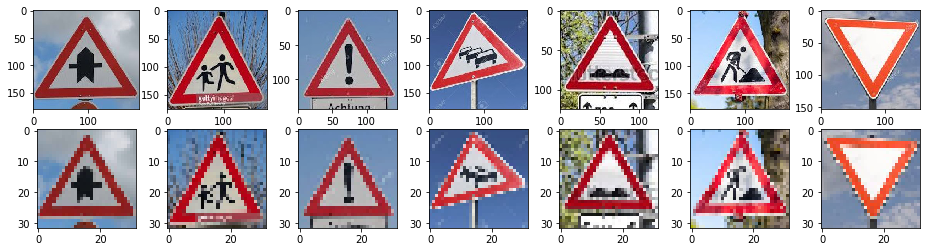

In [16]:
import glob

### Load the images and plot them here.
### Feel free to use as many code cells as needed.

imgs = []
fnames = glob.glob( "downloaded_imgs/*.jpg")
fig, axs = plt.subplots( 2, len(fnames), figsize=(16,4))
for i, fn in enumerate( fnames ) :
    img = cv2.cvtColor( cv2.imread( fn ), cv2.COLOR_BGR2RGB )
    img_rsz = cv2.resize( img , (32, 32))
    
    axs[0,i].imshow( img )
    axs[1,i].imshow( img_rsz )
    imgs.append( img_rsz )
    
imgs_4d = np.stack( imgs, axis = 0)

X_eval = h.normalize_mean_std( imgs_4d ).astype( np.float32 )

print( "Downloaded images in their original resolution and after resizing to 32x32" )

### Predict the Sign Type for Each Image

 1 conv1        conv2d           [30, 30, 32]     #params:     896
 2 max_p1       max_pool         [15, 15, 32]     #params:       0
 3 conv2        conv2d           [13, 13, 32]     #params:    9248
 4 max_p2       max_pool         [7, 7, 32]       #params:       0
 5 conv3        conv2d           [3, 3, 16]       #params:   12816
 6 flat1        flatten          [144]            #params:       0
 7 fc1          fully_connected  [120]            #params:   17400
 8 dropout_1    dropout          [120]            #params:       0
 9 fc2          fully_connected  [84]             #params:   10164
10 dropout_2    dropout          [84]             #params:       0
no non-linearity
11 logits       fully_connected  [43]             #params:    3655
Total params:   54179


In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

import tensorflow as tf 
reload( h )

from IPython.core.display import HTML
h.MY_DEV = "/cpu:0"
ckpt_fname = "model_checkpoints/model.435d9eb8.199.tf.ckpt"

tf.reset_default_graph()
netw_arch = getattr( arch, hyp_pars["netw_arch_name"] )
tnsr = h.build_network_and_metrics( (32,32,3), 43, netw_arch, hyp_pars )
saver = tf.train.Saver()

with tf.Session() as sess :
    saver.restore(sess, ckpt_fname )
    y_pred, top_5 = sess.run( [tnsr["y_pred"], tnsr["y_top_5"] ],
                              feed_dict={ tnsr["input"]: X_eval,
                                          tnsr["keep_prob"]: 1.} )
    

 1 conv1        conv2d           [30, 30, 32]     #params:     896
 2 max_p1       max_pool         [15, 15, 32]     #params:       0
 3 conv2        conv2d           [13, 13, 32]     #params:    9248
 4 max_p2       max_pool         [7, 7, 32]       #params:       0
 5 conv3        conv2d           [3, 3, 16]       #params:   12816
 6 flat1        flatten          [144]            #params:       0
 7 fc1          fully_connected  [120]            #params:   17400
 8 dropout_1    dropout          [120]            #params:       0
 9 fc2          fully_connected  [84]             #params:   10164
10 dropout_2    dropout          [84]             #params:       0
no non-linearity
11 logits       fully_connected  [43]             #params:    3655
Total params:   54179
INFO:tensorflow:Restoring parameters from model_checkpoints/model.435d9eb8.199.tf.ckpt


In [23]:
# for visualization, pick one images from training set for each class 
for i in range(43) :
    example_idx = np.where( y_train == i )[0][3]    
    plt.imsave(  f"examples/train_example_b{i}.jpg", X_train0[example_idx,...])    

signnames = pd.read_csv( "signnames.csv")
    
def make_data_row( fname, pred) :    
    return ( f'<tr> <td><img src="{fname}"></td> <td>{pred}</td> '
             f'<td>{signnames.loc[pred]["SignName"]}</td> ' 
             f'<td><img src="examples/train_example_b{pred}.jpg" /></td> </tr>' )

tbl_html = ( "<table>" +
            # Header 
            "<tr><th>Downloaded Image</th> <th>Predicted class</th> "
             "<th>Prediction Name</th> <th>Example of predicted class in training set</th></tr>" +
            # Data rows
           "\n   ".join( [ make_data_row( fname, pred )
                       for fname, pred in zip(fnames, y_pred) ] ) +
            "</table>") 

HTML( tbl_html )

Downloaded Image,Predicted class,Prediction Name,Example of predicted class in training set
,11,Right-of-way at the next intersection,
,28,Children crossing,
,18,General caution,
,1,Speed limit (30km/h),
,22,Bumpy road,
,25,Road work,
,13,Yield,


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [56]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

# Note: top_5 object we obtained at the same time as y_pred, when evaluating network over downloaded images a few cells ago

tbl_pieces = ( [ "<table>" , "<tr><th>Image</th>" ] + 
              # [ f"<th>Label {i}</th><th>Probability {i}</th>" for i in range(5) ] + [ "</tr>" ] )
               [ "<th> &nbsp; </th> </tr> "] )

for fname, probs, idxs in zip(fnames, top_5.values, top_5.indices ) :
    tbl_pieces.append( '<tr>' )
    tbl_pieces.append( f'<th><img src="{fname}"/> </th>' )
    tbl_pieces.append( '<td><table><tr> <th>Signal</th> <th>Probability</th> </tr>' )
    tbl_pieces.extend( [ f'<tr><td>{signnames.loc[idx]["SignName"]}</td> <td>{prob:.6g}</td></tr>' 
                        for idx, prob in zip(idxs,probs)]  ) 
    tbl_pieces.append( '</table> </td>' )
    #tbl_pieces.extend( [ f'<td>{signnames.loc[idx]["SignName"]}</td> <td>{prob:.4g}</td>' for idx, prob in zip(idxs,probs)]  ) 
    tbl_pieces.append( '</tr>' )

tbl_pieces.append( "</table>")

tbl_html = "\n".join( tbl_pieces )
HTML( tbl_html )

In [38]:
# print( tbl_html ) # produce html to put in writeup

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [43]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap( activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [40]:
tf.reset_default_graph()
netw_arch = getattr( arch, hyp_pars["netw_arch_name"] )
tnsr = h.build_network_and_metrics( (32,32,3), 43, netw_arch, hyp_pars )
saver = tf.train.Saver()

 1 conv1        conv2d           [30, 30, 32]     #params:     896
 2 max_p1       max_pool         [15, 15, 32]     #params:       0
 3 conv2        conv2d           [13, 13, 32]     #params:    9248
 4 max_p2       max_pool         [7, 7, 32]       #params:       0
 5 conv3        conv2d           [3, 3, 16]       #params:   12816
 6 flat1        flatten          [144]            #params:       0
 7 fc1          fully_connected  [120]            #params:   17400
 8 dropout_1    dropout          [120]            #params:       0
 9 fc2          fully_connected  [84]             #params:   10164
10 dropout_2    dropout          [84]             #params:       0
no non-linearity
11 logits       fully_connected  [43]             #params:    3655
Total params:   54179


In [51]:
with tf.Session() as sess :
    saver.restore(sess, ckpt_fname )
    activation_conv1 = tnsr['conv1'].eval(session=sess,feed_dict={tnsr['input'] : X_eval[0:1,...]})
    activation_maxp1 = tnsr['max_p1'].eval(session=sess,feed_dict={tnsr['input'] : X_eval[0:1,...]})
    activation_conv2 = tnsr['conv2'].eval(session=sess,feed_dict={tnsr['input'] : X_eval[0:1,...]})

INFO:tensorflow:Restoring parameters from model_checkpoints/model.435d9eb8.199.tf.ckpt


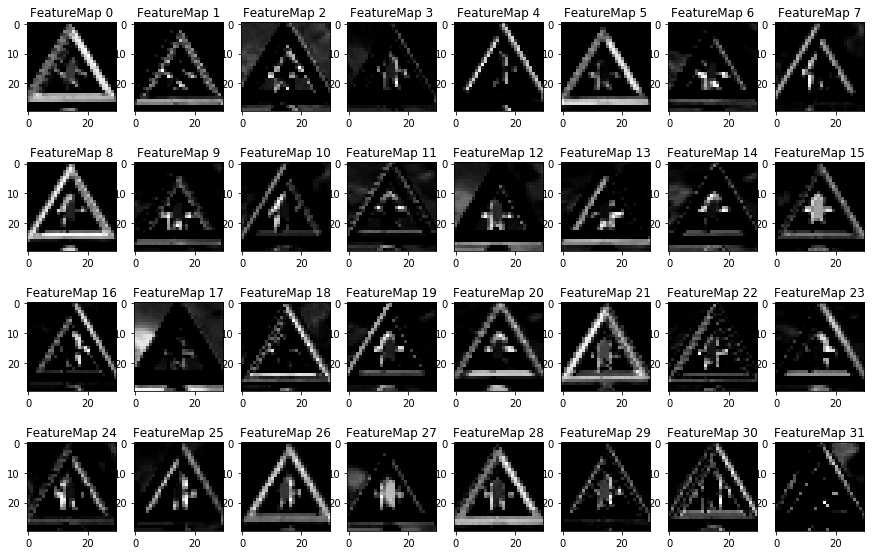

In [50]:
    
outputFeatureMap( activation_conv1, activation_min=-1, activation_max=-1 ,plt_num=1)

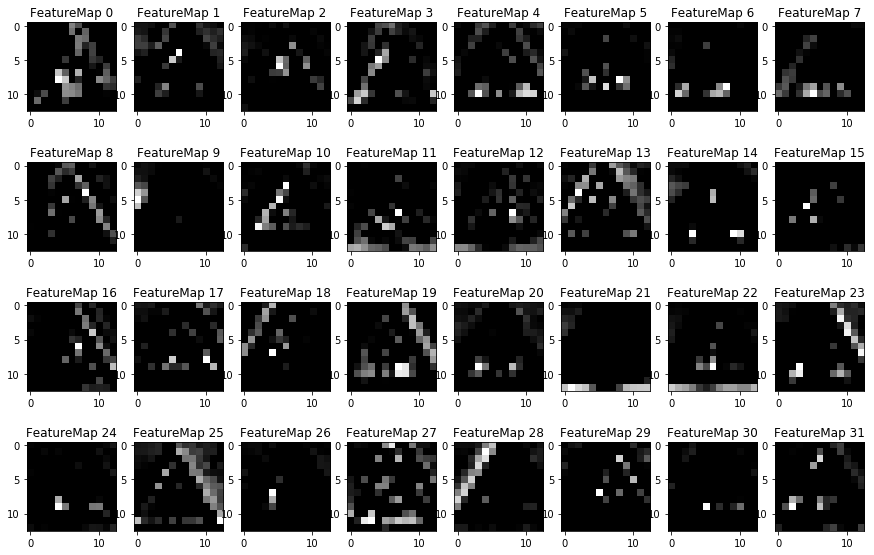

In [52]:
outputFeatureMap( activation_conv2, activation_min=-1, activation_max=-1 ,plt_num=1)

In [53]:
with tf.Session() as sess :
    saver.restore(sess, ckpt_fname )
    activation_conv1 = tnsr['conv1'].eval(session=sess,feed_dict={tnsr['input'] : X_eval[3:4,...]})
    activation_maxp1 = tnsr['max_p1'].eval(session=sess,feed_dict={tnsr['input'] : X_eval[3:4,...]})
    activation_conv2 = tnsr['conv2'].eval(session=sess,feed_dict={tnsr['input'] : X_eval[3:4,...]})

INFO:tensorflow:Restoring parameters from model_checkpoints/model.435d9eb8.199.tf.ckpt


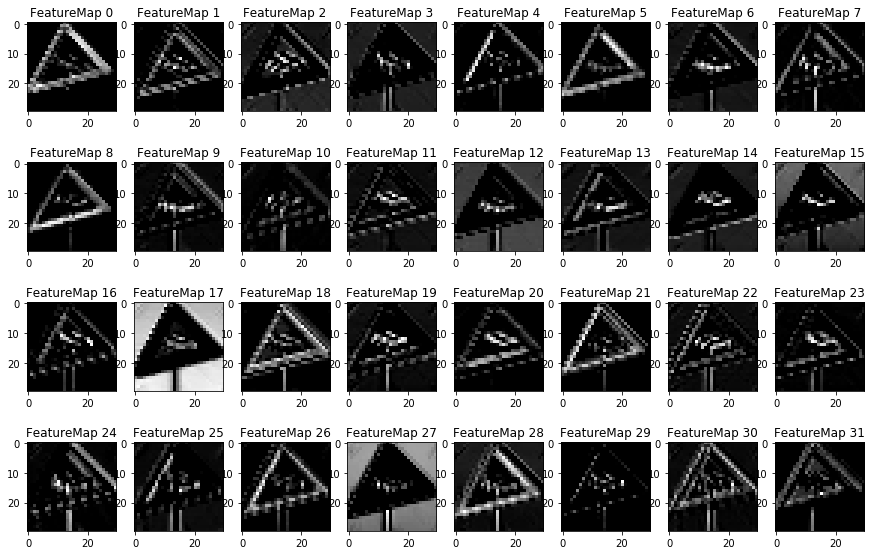

In [54]:
outputFeatureMap( activation_conv1, activation_min=-1, activation_max=-1 ,plt_num=1)

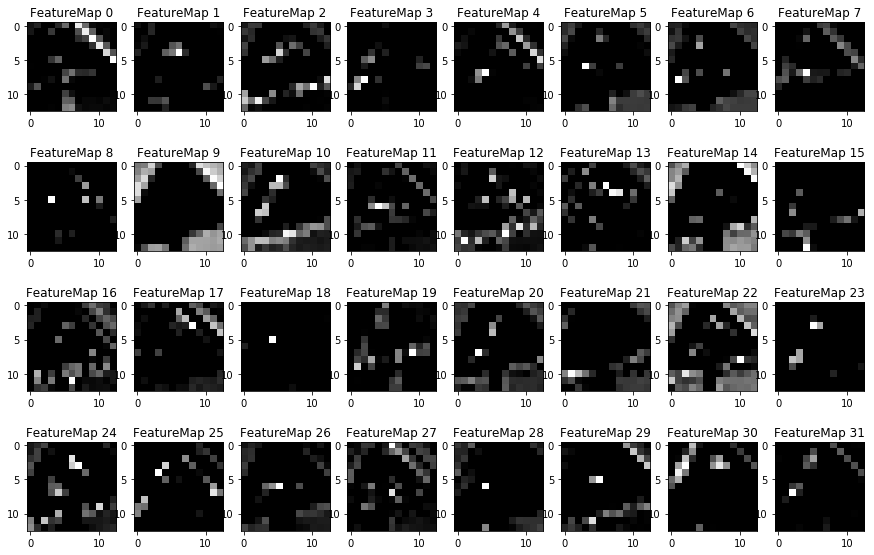

In [55]:
outputFeatureMap( activation_conv2, activation_min=-1, activation_max=-1 ,plt_num=1)